In [17]:
import numpy as np
import math
from random import seed
from random import random
from numba import jit, prange
import pandas as pd

from functions import comp_shortest_path, read_tsp_file, read_data, TestResult, total_dist, distance_matrix

In [18]:
T_start = 1000
T_end = 0.005
cooling_factor = 0.99
nMarkov = 280
coords = read_tsp_file("TSP-Configurations/a280.tsp")
# coords = read_tsp_file("TSP-Configurations/eil51.tsp")


In [19]:
def loop(n, nmarkov=nMarkov):
    for i in range(n):
        itr, min_cost, optimal_list_cities, best_cost = comp_shortest_path(
            T_start, T_end, cooling_factor, nmarkov, coords, dataset="a280", save_data=True)
        
def loop_markov(nloop, nmarkov_list):
    for nmarkov in nmarkov_list:
        loop(nloop,nmarkov)
    
        
        
# loop_markov(2,[140, 280])

In [20]:
# # Done for array([  70,  140,  210,  280,  350,  420,  490,  560,  630,  700,  770, 840,  910,  980, 1050, 1120, 1190, 1260, 1330, 1400,
#   1470, 1540, 1610, 1680, 1750, 1820, 1890, 1960, 2030, 2100, 2170, 2240, 2310, 2380, 2450, 2520, 2590, 2660, 2730, 2800])

ncities = 280
step = int(ncities/4)
start = int(step)
stop = int(ncities*10+step)
nmarkov_list = np.arange(start, stop, step, dtype=int)
nmarkov_list
# loop_markov(25, nmarkov_list)

array([  70,  140,  210,  280,  350,  420,  490,  560,  630,  700,  770,
        840,  910,  980, 1050, 1120, 1190, 1260, 1330, 1400, 1470, 1540,
       1610, 1680, 1750, 1820, 1890, 1960, 2030, 2100, 2170, 2240, 2310,
       2380, 2450, 2520, 2590, 2660, 2730, 2800])

In [21]:
# ncities = 280
# step = int(ncities/4)
# start = int(step)
# stop = int(ncities*10+step)
# nmarkov_list = np.arange(start, stop, step, dtype=int)

# loop_markov(10, nmarkov_list)

In [22]:
df = read_data()
headers = TestResult.headers()
df = df[df["Dataset"] == "a280"]
df.head()

,Minimal Cost,Optimal Path,iterations,Computation Time,Dataset,Start Temperature,End Temperature,Local Minima,Cooling Factor,Markov Chain Length
0,3137.416728,"[0, 4, 5, 276, 275, 274, 273, 8, 6, 7, 9, 10, ...",1215,5.626770,a280,1000,0.005,[0],0.99,280
1,3214.753563,"[0, 1, 279, 2, 3, 278, 277, 247, 248, 246, 249...",1215,5.992730,a280,1000,0.005,[0],0.99,280
2,3156.100379,"[0, 4, 6, 5, 276, 275, 274, 273, 8, 7, 9, 10, ...",1215,8.217154,a280,1000,0.005,[0],0.99,280
3,3242.031736,"[0, 3, 276, 275, 274, 5, 4, 6, 8, 7, 9, 10, 11...",1215,2.736086,a280,1000,0.005,[0],0.99,140
4,3736.358090,"[0, 1, 241, 242, 247, 248, 244, 237, 230, 231,...",1215,1.382401,a280,1000,0.005,[0],0.99,70


In [23]:
df.describe()
# df[headers[1]].tolist()[0]

# from pandas import read_csv
# def read_data():
#     df = read_csv(TestResult.get_filepath(), delimiter=" ")

#     # opt_path_list = df[TestResult.headers()[1]].map(stringlist_to_string)
#     # opt_path_list
#     # df = df.drop(columns=TestResult.headers()[1])
#     # df.insert(1,TestResult.headers()[1], opt_path_list.tolist())
#     return df

,Minimal Cost,iterations,Computation Time,Start Temperature,End Temperature,Cooling Factor,Markov Chain Length
count,1004.000000,1004.0,1004.000000,1004.0,1.004000e+03,1.004000e+03,1004.000000
mean,2885.145609,1215.0,35.900540,1000.0,5.000000e-03,9.900000e-01,1430.258964
std,182.348763,0.0,28.928820,0.0,8.677940e-19,1.110776e-16,810.315801
min,2646.487621,1215.0,1.254679,1000.0,5.000000e-03,9.900000e-01,70.000000
25%,2766.412912,1215.0,13.315980,1000.0,5.000000e-03,9.900000e-01,700.000000
50%,2832.082584,1215.0,36.859454,1000.0,5.000000e-03,9.900000e-01,1400.000000
75%,2964.554116,1215.0,54.570063,1000.0,5.000000e-03,9.900000e-01,2100.000000
max,3872.167646,1215.0,225.115042,1000.0,5.000000e-03,9.900000e-01,2800.000000


In [24]:
nmarkov_list

array([  70,  140,  210,  280,  350,  420,  490,  560,  630,  700,  770,
        840,  910,  980, 1050, 1120, 1190, 1260, 1330, 1400, 1470, 1540,
       1610, 1680, 1750, 1820, 1890, 1960, 2030, 2100, 2170, 2240, 2310,
       2380, 2450, 2520, 2590, 2660, 2730, 2800])

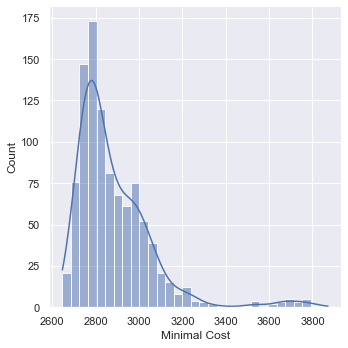

In [25]:
import seaborn as sns
sns.set_theme()
headers = TestResult.headers()
sns.displot(data=df[df[headers[6]] == 0.005], x=headers[0], kde=True)


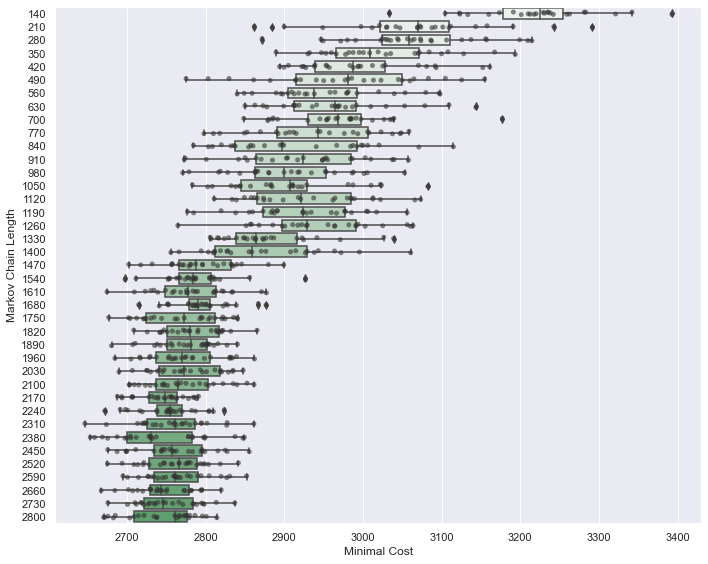

In [26]:
import matplotlib.pyplot as plt
sns.set_color_codes()

fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.boxplot(data=df[df[headers[9]] != 70], y=headers[9], x=headers[0], orient="h", ax=ax, palette="light:g")
sns.stripplot(data=df[df[headers[9]] != 70], y=headers[9], x=headers[0], orient="h", ax=ax, color=".2", alpha=0.6)
plt.tight_layout()
# plt.savefig("nmarkov_boxplot_cf=099_samples=25-2800.pdf")

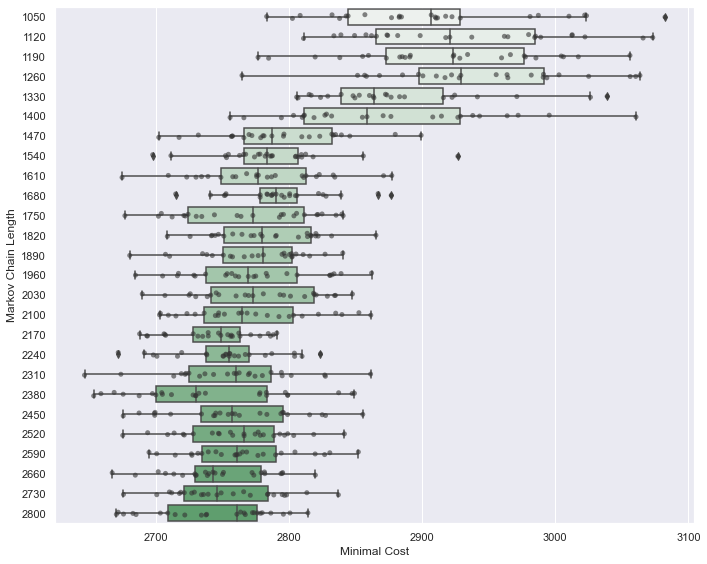

In [27]:
import matplotlib.pyplot as plt
sns.set_color_codes()

fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.boxplot(data=df[df[headers[9]] >= 1000], y=headers[9], x=headers[0], orient="h", ax=ax, palette="light:g")
sns.stripplot(data=df[df[headers[9]] >= 1000], y=headers[9], x=headers[0], orient="h", ax=ax, color=".2", alpha=0.6)
plt.tight_layout()
# plt.savefig("nmarkov_boxplot_cf=099_samples=25-1000_2800.pdf")

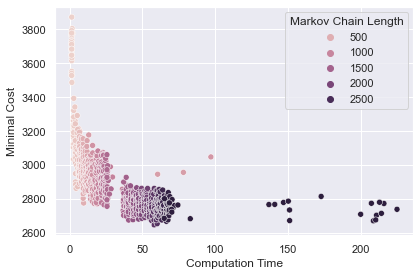

In [28]:

sns.scatterplot(data=df, x=headers[3], y=headers[0], hue=headers[9], hue_order=nmarkov_list)
plt.tight_layout()
# plt.savefig("nmarkov_scatter_comp_time_outliers.pdf")

In [13]:
# df_nmarkov_grouped = df[(df[headers[9]] > 70) and (df[headers[3]] < 100.0)].groupby(headers[9])
df_nmarkov_grouped = df[(df[headers[9]] > 70) & (df[headers[3]] < 100.0)].groupby(headers[9])


In [14]:
df_nmarkov_grouped.mean()

,Minimal Cost,iterations,Computation Time,Start Temperature,End Temperature,Cooling Factor
Markov Chain Length,,,,,,
140,3217.582569,1215.0,2.784454,1000.0,0.005,0.99
210,3063.532608,1215.0,4.213972,1000.0,0.005,0.99
280,3062.612178,1215.0,6.249404,1000.0,0.005,0.99
350,3024.138896,1215.0,6.812143,1000.0,0.005,0.99
420,2995.488716,1215.0,7.995643,1000.0,0.005,0.99
490,2976.958936,1215.0,9.330943,1000.0,0.005,0.99
560,2956.592908,1215.0,10.567878,1000.0,0.005,0.99
630,2964.370394,1215.0,11.831113,1000.0,0.005,0.99
700,2967.863231,1215.0,17.542711,1000.0,0.005,0.99


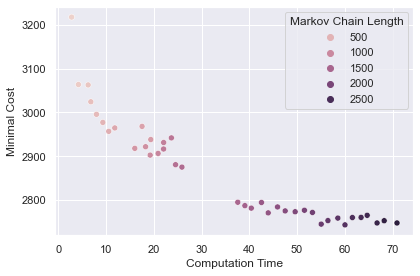

In [15]:
sns.scatterplot(x=headers[3], y=headers[0], data=df_nmarkov_grouped.mean(), hue=headers[9])
plt.tight_layout()
# plt.savefig("nmarkov_scatter_averages.pdf")

In [16]:
from functions import read_tsp_file, read_tsp_file_opt, total_dist, distance_matrix
coords = read_tsp_file("TSP-Configurations/a280.tsp")
opt_tour = read_tsp_file_opt("TSP-Configurations/a280.opt.tour.txt")

dist_matrix = distance_matrix(coords=coords)
optimal_tour_length = total_dist(opt_tour, dist_matrix)
print(optimal_tour_length)

IndexError: index 280 is out of bounds for axis 0 with size 280

In [8]:

def close_loop(optimal_list:list):
    """corrects optimal list where the loop isnt closed and doesnt start with a zero

        Args:
            optimal_list (list): optimal list that isnt closed
            
            >>> close_loop([4,5,6,19,29,39,0,1,2,3])
            [0, 1, 2, 3, 4, 5, 6, 19, 29, 39, 0]
            >>> close_loop([10, 20, 15, 2, 0, 11, 200])
            [0, 11, 200, 10, 20, 15, 2, 0]
            >>> close_loop([0, 1, 3, 2, 4])
            [0, 1, 3, 2, 4, 0]
            
    """
    
    arr = np.array(optimal_list)
    zero_index = np.where(arr == 0)[0]
    opt_array = np.roll(arr,-zero_index)
    optimal_list = list(opt_array)
    
    optimal_list.append(0)
    return optimal_list


def correct_row_opt_path(open_path:list):
    """checks if the row is already closed or started with zero and if not corrects

        Args:
            open_path (list): open path

        Returns:
            list: closed path
            
            >>> correct_row_opt_path([4,5,6,19,29,39,0,1,2,3])
            [0, 1, 2, 3, 4, 5, 6, 19, 29, 39, 0]
            >>> correct_row_opt_path([0, 1, 2, 3])
            [0, 1, 2, 3, 0]
            >>> correct_row_opt_path([0, 1, 3, 2, 0])
            [0, 1, 3, 2, 0]
    """
    if open_path[0] == 0 and open_path[-1] == 0:
        return open_path
    
    closed_path = close_loop(open_path)
    return closed_path


import doctest
doctest.testmod()

TestResults(failed=0, attempted=6)

### Correcting some issues in our data

The code below this markdown cell has been used to correct for the distance of the path and the issue we had with our previous way of saving the data to csv. pandas df saves the data more securely and handles some type issues which csv.writer screws up. 

In [ ]:
# def stringlist_to_string(stringlist:str):
#     list_of_strings = stringlist.removeprefix("[").removeprefix(" ").removesuffix("]").split()
#     return [int(x) for x in list_of_strings]

# df = pd.read_csv("data/TSP_SA_results_v2_maurits.csv")
# df = df[df[headers[4]] != "eil51"]
# opt_path_list = df[TestResult.headers()[1]].map(stringlist_to_string)
# opt_path_list
# df = df.drop(columns=TestResult.headers()[1])
# df.insert(1,TestResult.headers()[1], opt_path_list.tolist())
# df.head()
# # print("\n")
# df.describe()

In [42]:
# corrected_path = df[headers[1]].map(correct_row_opt_path)
# corrected_path
# df = df.drop(columns=headers[1])
# df.insert(1, "Optimal Path", corrected_path.tolist())

# df.head()

,Minimal Cost,Optimal Path,iterations,Computation Time,Dataset,Start Temperature,End Temperature,Local Minima,Cooling Factor,Markov Chain Length
43,2883.141287,"[0, 4, 5, 276, 275, 274, 273, 8, 6, 7, 9, 10, ...",1215,5.626770,a280,1000,0.005,[0],0.99,280
44,3049.284533,"[0, 1, 279, 2, 3, 278, 277, 247, 248, 246, 249...",1215,5.992730,a280,1000,0.005,[0],0.99,280
45,2955.740702,"[0, 4, 6, 5, 276, 275, 274, 273, 8, 7, 9, 10, ...",1215,8.217154,a280,1000,0.005,[0],0.99,280
46,3075.130567,"[0, 3, 276, 275, 274, 5, 4, 6, 8, 7, 9, 10, 11...",1215,2.736086,a280,1000,0.005,[0],0.99,140
47,3521.648985,"[0, 1, 241, 242, 247, 248, 244, 237, 230, 231,...",1215,1.382401,a280,1000,0.005,[0],0.99,70


In [43]:
# dist_matrix = distance_matrix(coords)
# corr_path_length = df["Optimal Path"].map(lambda x: total_dist(x, dist_matrix))
# df = df.drop(columns=headers[0])
# df.insert(0, headers[0], corr_path_length.tolist())
# df.head()

,Minimal Cost,Optimal Path,iterations,Computation Time,Dataset,Start Temperature,End Temperature,Local Minima,Cooling Factor,Markov Chain Length
43,3137.416728,"[0, 4, 5, 276, 275, 274, 273, 8, 6, 7, 9, 10, ...",1215,5.626770,a280,1000,0.005,[0],0.99,280
44,3214.753563,"[0, 1, 279, 2, 3, 278, 277, 247, 248, 246, 249...",1215,5.992730,a280,1000,0.005,[0],0.99,280
45,3156.100379,"[0, 4, 6, 5, 276, 275, 274, 273, 8, 7, 9, 10, ...",1215,8.217154,a280,1000,0.005,[0],0.99,280
46,3242.031736,"[0, 3, 276, 275, 274, 5, 4, 6, 8, 7, 9, 10, 11...",1215,2.736086,a280,1000,0.005,[0],0.99,140
47,3736.358090,"[0, 1, 241, 242, 247, 248, 244, 237, 230, 231,...",1215,1.382401,a280,1000,0.005,[0],0.99,70


In [44]:
# df.sort_values(headers[0], ascending=True).head()
# df.head()
# df.describe()

,Minimal Cost,iterations,Computation Time,Start Temperature,End Temperature,Cooling Factor,Markov Chain Length
count,1004.000000,1004.0,1004.000000,1004.0,1.004000e+03,1.004000e+03,1004.000000
mean,2885.145609,1215.0,35.900540,1000.0,5.000000e-03,9.900000e-01,1430.258964
std,182.348763,0.0,28.928820,0.0,8.677940e-19,1.110776e-16,810.315801
min,2646.487621,1215.0,1.254679,1000.0,5.000000e-03,9.900000e-01,70.000000
25%,2766.412912,1215.0,13.315980,1000.0,5.000000e-03,9.900000e-01,700.000000
50%,2832.082584,1215.0,36.859454,1000.0,5.000000e-03,9.900000e-01,1400.000000
75%,2964.554116,1215.0,54.570063,1000.0,5.000000e-03,9.900000e-01,2100.000000
max,3872.167646,1215.0,225.115042,1000.0,5.000000e-03,9.900000e-01,2800.000000


In [46]:
# df.to_csv("TSP_SA_results_v2_maurits.csv", index=False)

In [10]:
# df = pd.read_csv("TSP_SA_results_v2_maurits_corr.csv")
# df.head()